In [38]:
# Install packages

library(keras)

In [39]:
# Read Data

data <- read.csv("../input/cardiotocographic/Cardiotocographic.csv")

str(data)

'data.frame':	2126 obs. of  22 variables:
 $ LB      : int  120 132 133 134 132 134 134 122 122 122 ...
 $ AC      : num  0 0.00638 0.00332 0.00256 0.00651 ...
 $ FM      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ UC      : num  0 0.00638 0.00831 0.00768 0.00814 ...
 $ DL      : num  0 0.00319 0.00332 0.00256 0 ...
 $ DS      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DP      : num  0 0 0 0 0 ...
 $ ASTV    : int  73 17 16 16 16 26 29 83 84 86 ...
 $ MSTV    : num  0.5 2.1 2.1 2.4 2.4 5.9 6.3 0.5 0.5 0.3 ...
 $ ALTV    : int  43 0 0 0 0 0 0 6 5 6 ...
 $ MLTV    : num  2.4 10.4 13.4 23 19.9 0 0 15.6 13.6 10.6 ...
 $ Width   : int  64 130 130 117 117 150 150 68 68 68 ...
 $ Min     : int  62 68 68 53 53 50 50 62 62 62 ...
 $ Max     : int  126 198 198 170 170 200 200 130 130 130 ...
 $ Nmax    : int  2 6 5 11 9 5 6 0 0 1 ...
 $ Nzeros  : int  0 1 1 0 0 3 3 0 0 0 ...
 $ Mode    : int  120 141 141 137 137 76 71 122 122 122 ...
 $ Mean    : int  137 136 135 134 136 107 107 122 122 122 ...
 $ Median  : int  1

In [40]:
 # Change to matrix

data <- as.matrix(data)

dimnames(data) <- NULL

In [41]:
# Normalize 

data[ , 1:21] <- normalize(data[,1:21])

data[,22] <- as.numeric(data[,22]) - 1

summary(data)

       V1               V2                  V3                  V4           
 Min.   :0.2894   Min.   :0.000e+00   Min.   :0.000e+00   Min.   :0.000e+00  
 1st Qu.:0.3747   1st Qu.:0.000e+00   1st Qu.:0.000e+00   1st Qu.:5.398e-06  
 Median :0.3862   Median :4.572e-06   Median :0.000e+00   Median :1.286e-05  
 Mean   :0.3833   Mean   :8.915e-06   Mean   :2.721e-05   Mean   :1.264e-05  
 3rd Qu.:0.3949   3rd Qu.:1.596e-05   3rd Qu.:7.171e-06   3rd Qu.:1.900e-05  
 Max.   :0.4537   Max.   :5.983e-05   Max.   :1.446e-03   Max.   :4.244e-05  
       V5                  V6                  V7                  V8         
 Min.   :0.000e+00   Min.   :0.000e+00   Min.   :0.000e+00   Min.   :0.03438  
 1st Qu.:0.000e+00   1st Qu.:0.000e+00   1st Qu.:0.000e+00   1st Qu.:0.09199  
 Median :0.000e+00   Median :0.000e+00   Median :0.000e+00   Median :0.13506  
 Mean   :5.560e-06   Mean   :1.208e-08   Mean   :4.733e-07   Mean   :0.13498  
 3rd Qu.:9.478e-06   3rd Qu.:0.000e+00   3rd Qu.:0.000e+00 

In [42]:
# Data Partition

set.seed(1234)

ind <- sample(2, nrow(data), replace = T, prob = c(0.7, 0.3))

training <- data[ind == 1, 1:21]

test <- data[ind == 2, 1:21]

trainingtarget <- data[ind == 1, 22]

testtarget <- data[ind == 2, 22]

In [43]:
 #One Hot Encoding

trainLabels <- to_categorical(trainingtarget)

testLabels <- to_categorical(testtarget)

print(testLabels)

       [,1] [,2] [,3]
  [1,]    1    0    0
  [2,]    1    0    0
  [3,]    1    0    0
  [4,]    0    0    1
  [5,]    0    0    1
  [6,]    0    1    0
  [7,]    1    0    0
  [8,]    1    0    0
  [9,]    1    0    0
 [10,]    1    0    0
 [11,]    0    1    0
 [12,]    1    0    0
 [13,]    1    0    0
 [14,]    1    0    0
 [15,]    1    0    0
 [16,]    1    0    0
 [17,]    1    0    0
 [18,]    1    0    0
 [19,]    1    0    0
 [20,]    0    1    0
 [21,]    0    1    0
 [22,]    1    0    0
 [23,]    1    0    0
 [24,]    1    0    0
 [25,]    1    0    0
 [26,]    0    0    1
 [27,]    1    0    0
 [28,]    1    0    0
 [29,]    1    0    0
 [30,]    1    0    0
 [31,]    1    0    0
 [32,]    1    0    0
 [33,]    1    0    0
 [34,]    1    0    0
 [35,]    0    1    0
 [36,]    1    0    0
 [37,]    1    0    0
 [38,]    1    0    0
 [39,]    1    0    0
 [40,]    1    0    0
 [41,]    1    0    0
 [42,]    1    0    0
 [43,]    1    0    0
 [44,]    1    0    0
 [45,]    

In [44]:
# Create sequential model

model <- keras_model_sequential()

model %>% 
            layer_dense(units = 50, activation = 'relu', input_shape = c(21)) %>%
            layer_dense(units = 8, activation = 'relu') %>%
            layer_dense(units = 3, activation = 'softmax')

summary(model)

Model: "sequential_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_4 (Dense)                     (None, 50)                      1100        
________________________________________________________________________________
dense_5 (Dense)                     (None, 3)                       153         
Total params: 1,253
Trainable params: 1,253
Non-trainable params: 0
________________________________________________________________________________


In [45]:
# Compile

model %>%
            compile(loss = "categorical_crossentropy",
                   optimizer = 'adam',
                   metrics = 'accuracy')

In [46]:
# Fit Model

history <- model %>%
                fit(training,
                   trainLabels,
                   epoch = 200,
                   batch_size = 32,
                    validation_split = 0.2)

In [47]:
history

Trained on 1,218 samples (batch_size=32, epochs=200)
Final epoch (plot to see history):
        loss: 0.3289
    accuracy: 0.8678
    val_loss: 0.567
val_accuracy: 0.8131 

`geom_smooth()` using formula 'y ~ x'



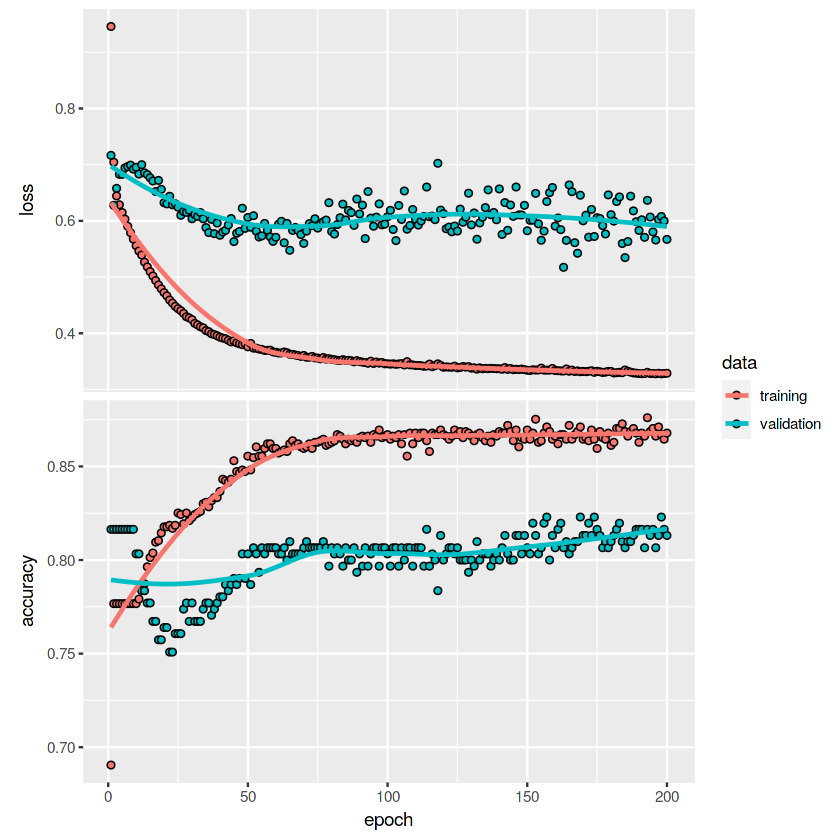

In [48]:
plot(history)

In [49]:
# Evaluate Model with test data

model1 <- model %>%
            evaluate(test, testLabels)

In [50]:
# Prediction and confusion matrix

prob <- model %>%
            predict_proba(test)

pred <- model %>%
            predict_classes(test)

table1 <- table(Predicted = pred, Actual = testtarget)

In [51]:
cbind(prob, pred, testtarget)

,,,pred,testtarget
0.9946891069,0.005300873,1.003051e-05,0,0
0.9898012280,0.010155311,4.338793e-05,0,0
0.9931754470,0.006683401,1.411552e-04,0,0
0.0004148365,0.090120301,9.094648e-01,2,2
0.0003451126,0.081662096,9.179928e-01,2,2
0.9791103005,0.016839312,4.050417e-03,0,1
0.9919495583,0.007958408,9.205197e-05,0,0
0.9943033457,0.005637059,5.956561e-05,0,0
0.9918169379,0.008099156,8.391671e-05,0,0
0.9927371144,0.007244549,1.836176e-05,0,0


In [52]:
# Fine tuen model 

table1

model1


         Actual
Predicted   0   1   2
        0 431  37   6
        1  24  55   4
        2   5   2  39

$loss
[1] 0.3916057

$accuracy
[1] 0.8706468